In [13]:
import numpy as np
import pandas as pd
import math
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [ ]:
def gradient_descent(x,lr,tolerance, it_limit):
    i = 0
    Q = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])
    c = np.array([[1],[0],[1]])
  
    gradient =  np.matmul(Q,x) + c
    while LA.norm(gradient) > tolerance and i < it_limit:
        x_t = x
        gradient = np.matmul(Q,x_t) + c
        x = x - lr*gradient
        i+=1
        #print(i)
        #print(LA.norm(gradient))
    return x

# 1. Gradient Descent

### Quadratic Problem

In [41]:
Q = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])
c = np.array([[1],[0],[1]])
x = np.array([[3],[5],[7]])

In [42]:
y = 0.5*np.matmul(np.matmul(x.T,Q),x) + np.matmul(c.T,x)
gradient = np.matmul(Q,x) + c
gradient
y

array([[43.]])

## Analytic Solution for Quadratic Problem

In [228]:
-np.matmul(LA.inv(Q),c)

array([[-1.],
       [-1.],
       [-1.]])

## Gradient Descent Exact Step

In [47]:
def gradient_descent_exact_step(x,tolerance, it_limit,Q_m,c_m):
    i = 0
    df = pd.DataFrame(columns=['k','x_k','p_k','norm_gradient','lr'])
    
  
    gradient =  np.matmul(Q_m,x) + c_m
    while LA.norm(gradient) > tolerance and i < it_limit:
        x_k = x
        gradient = np.matmul(Q_m,x_k) + c_m
        lr = np.matmul(gradient.T,gradient)/np.matmul(np.matmul(gradient.T,Q),gradient)
        x = x - lr*gradient
        i+=1
        lr = np.matmul(gradient.T,gradient)/np.matmul(np.matmul(gradient.T,Q),gradient)
        run = {'k':i, 'x_k':x_k,'p_k':gradient,'norm_gradient':LA.norm(gradient),'lr':lr}
        df = df.append(run, ignore_index=True)
        #print(i)
        #print(LA.norm(gradient))
    return df
    

In [93]:
Q = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])
c = np.array([[1],[0],[1]])
x = np.array([[3],[5],[7]])
gd_exact_1=gradient_descent_exact_step(x = x,tolerance=1e-6, it_limit=30,Q_m=Q,c_m=c)
gd_exact_1.head()

,k,x_k,p_k,norm_gradient,lr
0,1,"[[3], [5], [7]]","[[2], [0], [10]]",10.198039,[[0.5]]
1,2,"[[2.0], [5.0], [2.0]]","[[0.0], [6.0], [0.0]]",6.000000,[[0.5]]
2,3,"[[2.0], [2.0], [2.0]]","[[3.0], [0.0], [3.0]]",4.242641,[[0.5]]
3,4,"[[0.5], [2.0], [0.5]]","[[0.0], [3.0], [0.0]]",3.000000,[[0.5]]
4,5,"[[0.5], [0.5], [0.5]]","[[1.5], [0.0], [1.5]]",2.121320,[[0.5]]


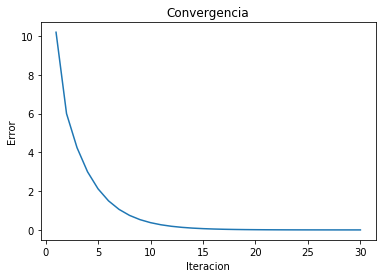

In [95]:
plt.plot(gd_exact_1['k'],gd_exact_1['norm_gradient'])
plt.title("Convergencia")
plt.xlabel("Iteracion")
plt.ylabel("Error")
plt.show()

In [94]:
Q = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])
c = np.array([[1],[0],[1]])
x = np.array([[-1],[2],[-3]])
gd_exact_2 =gradient_descent_exact_step(x = x,tolerance=1e-6, it_limit=30,Q_m=Q,c_m=c)
gd_exact_2.head()

,k,x_k,p_k,norm_gradient,lr
0,1,"[[-1], [2], [-3]]","[[-3], [8], [-7]]",11.045361,[[0.30198019801980197]]
1,2,"[[-0.09405940594059414], [-0.41584158415841577...","[[1.2277227722772275], [0.14851485148514865], ...",1.287014,[[0.5423701611350068]]
2,3,"[[-0.7599396037697113], [-0.49639160808935745]...","[[-0.023487599450064955], [0.45997494401812267...",0.473704,[[0.6089269626485911]]
3,4,"[[-0.7456373711766765], [-0.7764827536447687],...","[[0.2852080112914157], [-0.04706818130254431],...",0.386104,[[0.42703457410983775]]
4,5,"[[-0.86743105281122], [-0.756383012888112], [-...","[[0.021520907265672018], [0.22422996593110212]...",0.225920,[[0.6026588726179862]]


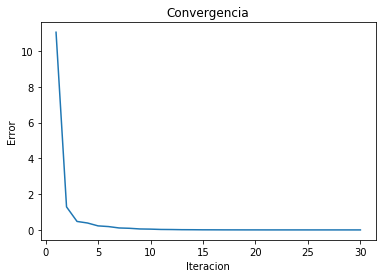

In [96]:
plt.plot(gd_exact_2['k'],gd_exact_2['norm_gradient'])
plt.title("Convergencia")
plt.xlabel("Iteracion")
plt.ylabel("Error")
plt.show()

## Regarding gradient descent with exact line search: 
For both problems, the error converges quickly, with a quadratic convergence rate. This is expected as exact line search finds the optimal step size.

## Constant Step Gradient Descent 

In [25]:
def gradient_descent_constant_step(x,lr,tolerance, it_limit,Q_m,c_m):
    i = 0
    df = pd.DataFrame(columns=['k','x_k','p_k','norm_gradient'])
  
    gradient =  np.matmul(Q_m,x) + c_m
    while LA.norm(gradient) > tolerance and i < it_limit:
        x_k = x
        gradient = np.matmul(Q_m,x_k) + c_m
        x = x - lr*gradient
        i+=1
        run = {'k':i, 'x_k':x_k,'p_k':gradient,'norm_gradient':LA.norm(gradient)}
        df = df.append(run, ignore_index=True)
        #print(i)
        #print(LA.norm(gradient))
    return df
    

In [50]:
lrs = [0.001, 0.01, 0.1, 0.5, 1]
Q = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])
c = np.array([[1],[0],[1]])
datos_1 = gradient_descent_constant_step(x = np.array([[3],[5],[7]]),lr=0.5,tolerance=1e-6, it_limit=100,Q_m=Q,c_m=c)

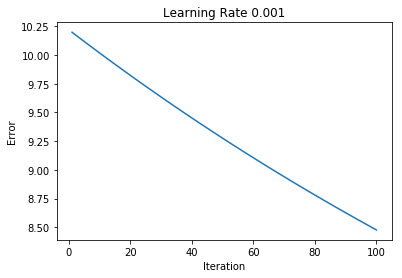

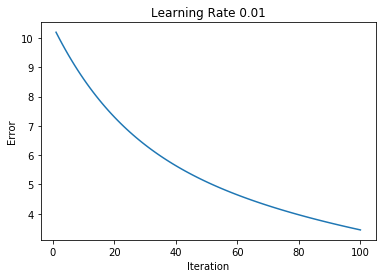

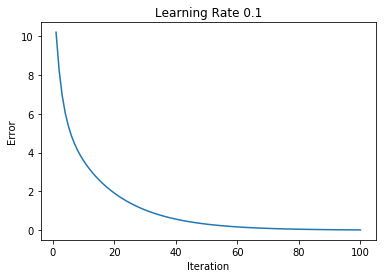

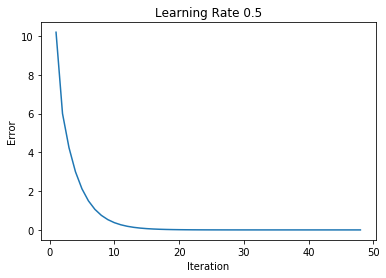

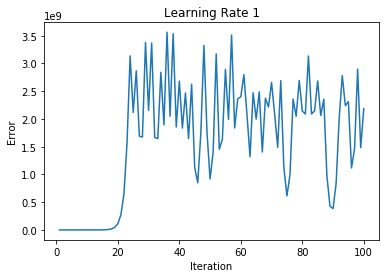

In [77]:
for learning_rate in lrs:
    results = gradient_descent_constant_step(
        x = np.array([[3],[5],[7]]),lr=learning_rate,tolerance=1e-6, it_limit=100,Q_m=Q,c_m=c)
    plt.plot(results['k'],results['norm_gradient'])
    plt.title(str("Learning Rate "+str(learning_rate)))
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.show()

## Regarding step sizes: 

A learning rate of 0.001 shows a linear convergence rate as the error decreases in the same size for each iteration.
A learning rate of 0.01 and 0.1 show a tendency to a quadratic convergence rate, the latter being more pronounced. This is expected, as a bigger step size implies that for each iteration the algorithm will move faster towards the global minimum.
A learning rate of 0.5 shows a quadratic convergence rate. At about 10 iterations, this step size makes the algorithm converge. Of all step sizes, 0.5 is the most efficient.
A learning rate of 1 shows osciliations in the error graph. This means that the step size is to big and that the algorithm passes through the minimum several times, thus the error increases and decreases erratically

# Variable Step Size Gradient Descent 

In [38]:

def gradient_descent_var_step(x,tolerance, it_limit,Q_m,c_m,lr=1):
    i = 1
    df = pd.DataFrame(columns=['k','x_k','p_k','norm_gradient','lr'])
  
    gradient =  np.matmul(Q_m,x) + c_m
    while LA.norm(gradient) > tolerance and i < it_limit + 1:
        x_k = x
        gradient = np.matmul(Q_m,x_k) + c_m
        lr = 1/i
        x = x - lr*gradient 
        i+=1
        run = {'k':i, 'x_k':x_k,'p_k':gradient,'norm_gradient':LA.norm(gradient),'lr':lr}
        df = df.append(run, ignore_index=True)
        #print(i)
        #print(LA.norm(gradient))
    return df
    

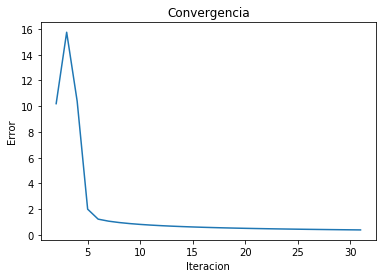

In [86]:
Q = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])
c = np.array([[1],[0],[1]])
x = np.array([[3],[5],[7]])
gd_varstep_1 = gradient_descent_var_step(x = x,tolerance=1e-6, it_limit=30,Q_m=Q,c_m=c)
plt.plot(gd_varstep_1['k'],gd_varstep_1['norm_gradient'])
plt.title("Convergencia")
plt.xlabel("Iteracion")
plt.ylabel("Error")
plt.show()

In [87]:
gd_varstep_1.head()

,k,x_k,p_k,norm_gradient,lr
0,2,"[[3], [5], [7]]","[[2], [0], [10]]",10.198039,1.000000
1,3,"[[1.0], [5.0], [-3.0]]","[[-2.0], [12.0], [-10.0]]",15.748016,0.500000
2,4,"[[2.0], [-1.0], [2.0]]","[[6.0], [-6.0], [6.0]]",10.392305,0.333333
3,5,"[[0.0], [1.0], [0.0]]","[[0.0], [2.0], [0.0]]",2.000000,0.250000
4,6,"[[0.0], [0.5], [0.0]]","[[0.5], [1.0], [0.5]]",1.224745,0.200000


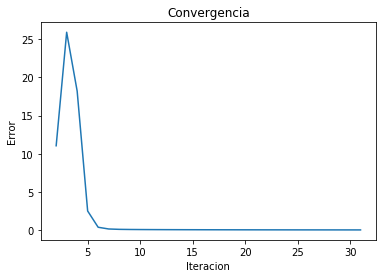

In [89]:
Q = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])
c = np.array([[1],[0],[1]])
x = np.array([[-1],[2],[-3]])
gd_varstep_2 = gradient_descent_var_step(x = x,tolerance=1e-6, it_limit=30,Q_m=Q,c_m=c)
plt.plot(gd_varstep_2['k'],gd_varstep_2['norm_gradient'])
plt.title("Convergencia")
plt.xlabel("Iteracion")
plt.ylabel("Error")
plt.show()

In [90]:
gd_varstep_2.head()

,k,x_k,p_k,norm_gradient,lr
0,2,"[[-1], [2], [-3]]","[[-3], [8], [-7]]",11.045361,1.000000
1,3,"[[2.0], [-6.0], [4.0]]","[[11.0], [-18.0], [15.0]]",25.884358,0.500000
2,4,"[[-3.5], [3.0], [-3.5]]","[[-9.0], [13.0], [-9.0]]",18.193405,0.333333
3,5,"[[-0.5], [-1.333333333333333], [-0.5]]","[[1.333333333333333], [-1.666666666666666], [1...",2.516611,0.250000
4,6,"[[-0.8333333333333333], [-0.9166666666666665],...","[[0.25], [-0.16666666666666652], [0.25]]",0.390868,0.200000


## 2. Rosenbrock Function Optimization 

In [145]:
def gd_rosenbrock(x,y,tolerance,lr, it_limit):
    i = 0
    df = pd.DataFrame(columns=['k','x_k','y_k','p_k','error','lr'])
    
  
    gradient = np.array([2*((200*x**3) -(200*x*y) + x - 1),200*(y-x**2)])
    error = 1
    while error > tolerance and i < it_limit:
        x_k = x
        y_k = y
        gradient = np.array([2*((200*x_k**3)-(200*x_k*y_k) +x_k - 1),200*(y_k-x_k**2)])
        error = LA.norm(gradient)
        x = x - lr*gradient[0]
        y = y - lr*gradient[1]
        run = {'k':i, 'x_k':x_k,'y_k':y_k,'p_k':gradient,'error':error,'lr':lr}
        df = df.append(run, ignore_index=True)
        i+=1
        #print(i)
        #print(LA.norm(gradient))
    return df
    

### Prove that the global minimum is at (x,y).T = (1,1)

In [147]:
gd_rosenbrock(x=1,y=1,tolerance=10e-8,lr=0.05,it_limit=1000)

,k,x_k,y_k,p_k,error,lr
0,0,1,1,"[0, 0]",0.0,0.05


## Initial values (x,y).T = (0,0)

In [149]:
rosenbrock = gd_rosenbrock(x=0,y=0,tolerance=10e-8,lr=0.05,it_limit=1000)

C:\Users\jctep\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jctep\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [150]:
rosenbrock

,k,x_k,y_k,p_k,error,lr
0,0,0,0,"[-2, 0]",2.000000e+00,0.05
1,1,0.1,0,"[-1.4, -2.0000000000000004]",2.441311e+00,0.05
2,2,0.17,0.1,"[-6.494800000000003, 14.220000000000008]",1.563300e+01,0.05
3,3,0.49474,-0.611,"[168.34247834736976, -171.1535335200001]",2.400682e+02,0.05
4,4,-7.92238,7.94668,"[-173731.92605259476, -10963.498051635775]",1.740775e+05,0.05
5,5,8678.67,556.122,"[261467008397566.44, -15063764973.151812]",2.614670e+14,0.05
6,6,-1.30734e+13,7.53189e+08,"[-8.93759553661713e+41, -3.41824981948028e+28]",8.937596e+41,0.05
7,7,4.4688e+40,1.70912e+27,"[3.5697030946777474e+124, -3.9940306988079214e...",3.569703e+124,0.05
8,8,-1.78485e+123,1.99702e+82,"[-inf, -6.371390092075944e+248]",inf,0.05
9,9,inf,3.1857e+247,"[nan, -inf]",NaN,0.05


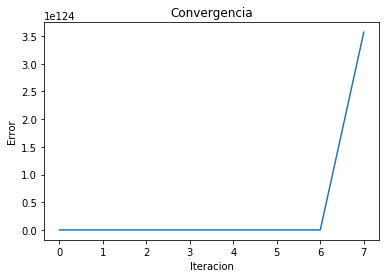

In [152]:
plt.plot(rosenbrock['k'],rosenbrock['error'])
plt.title("Convergencia")
plt.xlabel("Iteracion")
plt.ylabel("Error")
plt.show()

C:\Users\jctep\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jctep\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


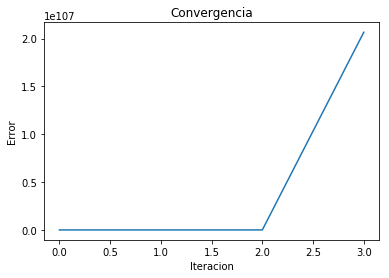

In [155]:
rosenbrock_5_5 = gd_rosenbrock(x=5,y=5,tolerance=10e-8,lr=0.05,it_limit=1000)
plt.plot(rosenbrock_5_5['k'],rosenbrock_5_5['error'])
plt.title("Convergencia")
plt.xlabel("Iteracion")
plt.ylabel("Error")
plt.show()

C:\Users\jctep\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jctep\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


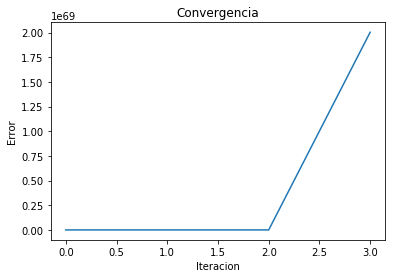

In [156]:
rosenbrock_2_2 = gd_rosenbrock(x=2,y=2,tolerance=10e-8,lr=0.05,it_limit=1000)
plt.plot(rosenbrock_2_2['k'],rosenbrock_2_2['error'])
plt.title("Convergencia")
plt.xlabel("Iteracion")
plt.ylabel("Error")
plt.show()

## Regarding initial values at Rosenbrock optimization 

After a few iterations, error tends toward infinity. This shows how difficult is to find the global minimum in this function used to evaluate algorithm performance